<a href="https://colab.research.google.com/github/jumafernandez/clasificacion_correos/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de datos: Dataset consolidado

__Título:__ Etiquetado semi-supervisado multiclase de correos electrónicos a partir de estrategias de extracción de características y _Elasticsearch_

__Autores:__ Juan Manuel Fernandez, Marcelo Errecalde

En esta notebook se consolidan las clases de los correos que forman parte del trabajo dado que se encontraron clases solapadas y ejemplos mal clasificados:

## 0. Misceláneos:

### Descarga de librerias necesarias

In [1]:
!pip install requests
!pip install wget

### Se carga el dataset

Se carga el dataset en un dataframe:

In [2]:
# Descargo los correos ya etiquetados
from os import path
import pandas as pd

if not (path.exists('correos-train-80.csv')):
    !wget https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/correos-train-80.csv

if not (path.exists('correos-test-20.csv')):
    !wget https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/50jaiio/correos-test-20.csv

# Cargo todo el conjunto de correos en dos dataframes
correos_train = pd.read_csv('correos-train-80.csv')
correos_test = pd.read_csv('correos-test-20.csv')

In [3]:
import pandas as pd

# Cargo TODOS los correos en un dataframe
correos = pd.concat([correos_train, correos_test], ignore_index=True)

correos.shape

(1000, 24)

In [4]:
correos.head()

,Consulta,dia_semana,semana_del_mes,mes,cuatrimestre,anio,hora_discretizada,dni_discretizado,legajo_discretizado,posee_legajo,posee_telefono,carrera_valor,proveedor_correo,cantidad_caracteres,proporcion_mayusculas,proporcion_letras,cantidad_tildes,cantidad_palabras,cantidad_palabras_cortas,proporcion_palabras_distintas,frecuencia_signos_puntuacion,cantidad_oraciones,utiliza_codigo_asignatura,clase
0,quisiera saber porque no tengo el numero de le...,6,1,2,1,2016,3,5,0,0,0,17,4,135,0.0,0.822222,0,23,10,0.956522,0.014815,1,0,12
1,quería cambiarme al prof. de educ. física. qui...,0,1,4,1,2016,0,3,3,1,1,55,6,259,0.0,0.795367,8,47,27,0.829787,0.023166,5,0,1
2,hola. quiero saber en que condición estoy para...,3,3,2,1,2019,0,1,1,1,1,27,4,191,0.0,0.780105,1,35,19,0.885714,0.036649,4,0,15
3,"estimados, no puedo inscribirme a las cursadas...",2,4,2,1,2018,3,1,1,1,1,6,13,242,0.0,0.805785,1,41,22,0.829268,0.028926,2,0,15
4,estoy tratando de realizar la prescripción on-...,4,4,5,1,2018,3,6,0,0,1,0,4,141,0.0,0.808511,3,26,14,0.846154,0.007092,1,0,11


## 1. EDA (Análisis exploratorio de datos)

Se generan gráficos para el análisis exploratorio. Primero se cargan las librerías gráficas:

In [5]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt

### 1.1 Gráfico del día de la semana

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

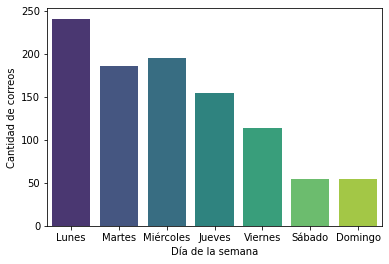

In [6]:
dias_letras = numpy.array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
dia_numeros = list(correos['dia_semana'])

dia_letras_correos = dias_letras[dia_numeros]

sns.countplot(dia_letras_correos, 
              palette="viridis", 
              order=dias_letras);
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de correos")



### 1.2 Gráfico la semana del mes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

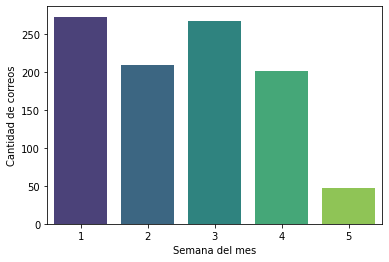

In [7]:
semana_numeros = list(correos['semana_del_mes'])

sns.countplot(semana_numeros, 
              palette="viridis"); 
plt.xlabel("Semana del mes")
plt.ylabel("Cantidad de correos")

### 1.3 Mes de la consulta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de correos')

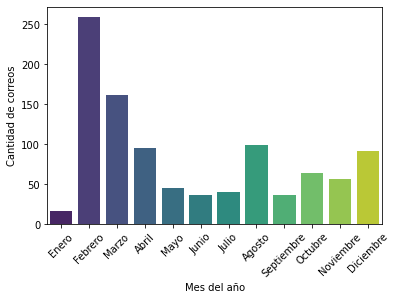

In [8]:
mes_letras = numpy.array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

correos['mes'] = correos['mes']-1
mes_numeros = list(correos['mes'])

mes_letras_correos = mes_letras[mes_numeros]

sns.countplot(mes_letras_correos,
              palette="viridis", 
              order=mes_letras);
plt.xlabel("Mes del año")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de correos")


### 1.4 Año de la consulta

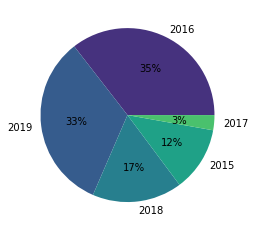

In [9]:
#define data
data = list(correos['anio'].value_counts().reset_index(drop=True))
labels = list(pd.Series(correos['anio'].unique()))

#define Seaborn color palette to use
colors = sns.color_palette('viridis')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### 1.5 Serie de tiempo con la base de consultas completa

In [10]:
from google.colab import drive
drive.mount('drive')
!cp "drive/My Drive/correos-procesados.csv" correos-procesados.csv

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [11]:
# Cargo los datos de TODA LA SERIE en un df
df_correos_todos = pd.read_csv('correos-procesados.csv')
df_correos_todos.shape

(19776, 10)

In [12]:
# Se eliminan los datos que no son fechas
correos_por_fecha = pd.to_datetime(df_correos_todos['fecha'], errors='coerce')

In [13]:
# Se agrupan por mes los correos
correos_por_mes = correos_por_fecha.groupby(correos_por_fecha.dt.to_period('Q')).agg('count')

In [22]:
correos['fecha'] = '01-' + correos['mes'].astype(str) + '-' + correos['anio'].astype(str)

correos_et_por_fecha = pd.to_datetime(correos['fecha'], errors='coerce')

# Se agrupan por mes los correos
correos_et_por_mes = correos_et_por_fecha.groupby(correos_et_por_fecha.dt.to_period('Q')).agg('count')

(array([735599., 735964., 736330., 736695., 737060.]),
 <a list of 5 Text major ticklabel objects>)

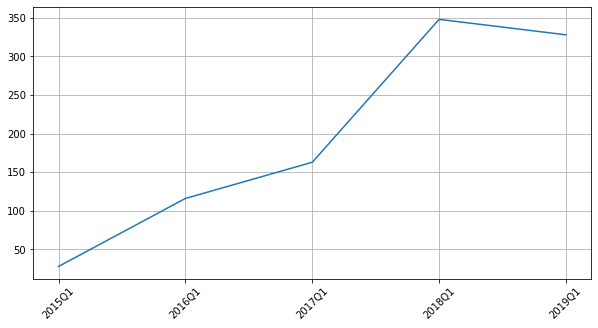

In [24]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(correos_por_mes.index.array.to_timestamp(), 
         correos_por_mes.values, 
         linestyle = 'solid')

plt.xticks(correos_por_mes.index.array.to_timestamp(), correos_por_mes.index)
plt.xticks(rotation=45)

In [28]:
colors = sns.color_palette('viridis')

colors.as_hex



<bound method _ColorPalette.as_hex of [(0.275191, 0.194905, 0.496005), (0.212395, 0.359683, 0.55171), (0.153364, 0.497, 0.557724), (0.122312, 0.633153, 0.530398), (0.288921, 0.758394, 0.428426), (0.626579, 0.854645, 0.223353)]>

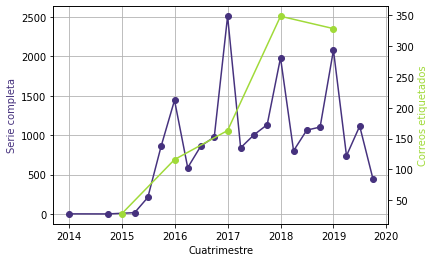

<Figure size 720x360 with 0 Axes>

In [30]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
plt.figure(figsize=(10, 5))
ax.grid()
ax.plot(correos_por_mes.index.array.to_timestamp(), 
         correos_por_mes.values, 
         linestyle = 'solid',
         color=(0.275191, 0.194905, 0.496005), 
         marker="o")

# set x-axis label
ax.set_xlabel("Cuatrimestre")

#plt.xticks(correos_por_mes.index.array.to_timestamp(), correos_por_mes.index)
#plt.xticks(rotation=45)

# set y-axis label
ax.set_ylabel("Serie completa",color=(0.275191, 0.194905, 0.496005))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(correos_et_por_mes.index.array.to_timestamp(), 
         correos_et_por_mes.values, 
         linestyle = 'solid',
         color=(0.626579, 0.854645, 0.223353), 
         marker="o")

ax2.set_ylabel("Correos etiquetados", color=(0.626579, 0.854645, 0.223353))

plt.show()

### 5.1 Histograma de Clases

A continuación se plantea una función para graficar el histograma de clases (gráfico de barras con frecuencia observada por clase):


			Distribución de clases para el Total dataset


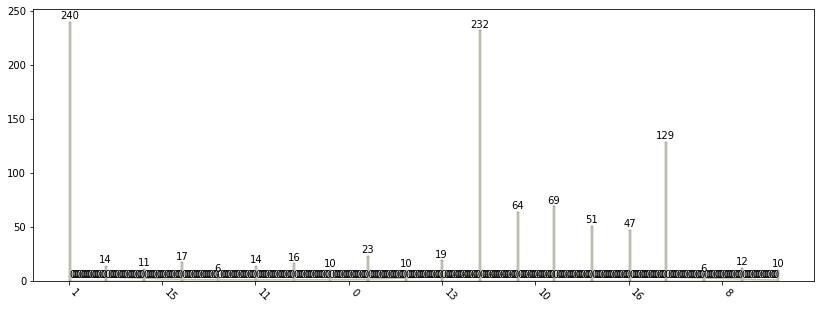

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

def hist_clases(serie_clases, desc_plot, filename_plot):
  """
  Se plotean las clases en función de la distribución de la frecuencia
  observada en cada dataset
  """

  # Set figure size
  plt.figure(figsize=(14,5))

  ax = sns.histplot(serie_clases, kde=True, stat='count', 
                    bins=serie_clases.unique(), binwidth=0.06, 
                    color='#c8c6a7', alpha=0.7)

  ax.set_xticklabels(serie_clases.unique(),
                    rotation=-45, 
                    horizontalalignment='left', fontweight='light')

  for p in ax.patches:
      ax.annotate(f'{p.get_height():.0f}\n',
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='center', color='black')

  # Quito el nombre de los ejes (de forma rústica)
  plt.xlabel('', fontsize=12)
  plt.ylabel('', fontsize=12)

  # Guardo el plot en un png
  plt.savefig(filename_plot, optimize=True, transparent=True, bbox_inches = 'tight')

  # Muestro el gráfico con una descripción
  print(f'\t\t\tDistribución de clases para el {desc_plot}')
  plt.show()  

hist_clases(correos['clase'], 'Total dataset', 'histograma_total.png')

In [16]:
correos.shape

(1000, 24)

## 6. Train/Test dataset

Ahora, se splitean los datasets a en una proporción 80/20. Estos datasets se utilizarán para _feature extraction_ y para la generación de los modelos:

In [17]:
# Separo datos de entrenamiento y testing
from sklearn.model_selection import train_test_split

X = correos_etiquetados.drop(columns=['clase'])
y = correos_etiquetados['clase']

# Separo en 80-20 entrenamiento/validación y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

NameError: ignored

Ahora unificamos X e y para persistir los datasets:

In [ ]:
# Reordeno el índice para poder concatenar con el y_train e y_test

# Train
df_train = X_train.reset_index(drop=True)
df_train['clase'] = y_train.reset_index(drop=True)

# Test
df_test = X_test.reset_index(drop=True)
df_test['clase'] = y_test.reset_index(drop=True)

In [ ]:
df_test[['consulta', 'clase']].head()

Por último se persisten en _Drive_:

In [ ]:
# Me autentico en Drive
from google.colab import drive

# Guardo en Drive todos los correos
df_train.to_csv('correos-consolidado.csv', index=False)
drive.mount('drive')
!cp correos-consolidado.csv "drive/My Drive/"

# Guardo en Drive los datos de entrenamiento
df_train.to_csv('correos-train-jaiio-80.csv', index=False)
drive.mount('drive')
!cp correos-train-jaiio-80.csv "drive/My Drive/"

# Guardo en Drive los datos de testeo
df_test.to_csv('correos-test-jaiio-20.csv', index=False)
drive.mount('drive')
!cp correos-test-jaiio-20.csv "drive/My Drive/"

# Referencias:
1. [Presentación](0) de apoyo al [Proyecto de Investigación](1) "Clasificación automática de correos electrónicos".

2. Clasificacion de textos por etiquetado de palabras: [short paper](2).

3. [API](3) del diccionario Collins.

4. [Funciones](4) de la [API](3) del diccionario Collins.

5. Librería [clusteval](5) para la evaluación KMeans.

[0]:https://docs.google.com/presentation/d/1-gdZ3dUI2pAfXM6Bgau53U7G4g2Bkv6DlxGESnu7A20/edit?usp=sharing 
[1]:https://github.com/jumafernandez/clasificacion_correos 
[2]:https://www.aaai.org/Papers/AAAI/2004/AAAI04-068.pdf
[3]:https://pypi.org/project/collins-client/
[4]:https://api.collinsdictionary.com/api/v1/documentation/html
[5]:https://clusteval.sdu.dk/1/mains